In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

PIDGIN = pd.read_csv("../data/PIDGINv4/PIDGINv4_processed.csv.gz", compression="gzip")
PIDGIN = PIDGIN.groupby("Standardized_SMILES").median().reset_index()
PIDGIN

,Standardized_SMILES,P18405_10.0,Q16850_100.0,Q09428_100.0,Q14831_1.0,Q00537_1.0,O14638_10.0,P60900_10.0,P07510_1.0,Q13698_100.0,...,P33261_10.0,Q9UIF8_100.0,Q13951_100.0,P00918_100.0,P37840_10.0,Q9UK17_100.0,Q9NUW8_100.0,Q15139_100.0,P28335_100.0,O14578_10.0
0,Brc1c(NC2=[NH+]CCN2)ccc2nccnc12,0.00625,0.061538,0.078947,0.001000,0.028571,0.090909,0.001,0.081227,0.054545,...,0.099085,0.055556,0.217647,0.001000,0.076471,0.001000,0.055446,0.257143,0.088889,0.294590
1,C,0.01875,0.030769,0.042105,0.078571,0.001000,0.045455,0.001,0.606022,0.001000,...,0.277340,0.277778,0.770588,0.955556,0.411765,0.009091,0.001000,0.471429,0.001000,0.015785
2,C#CC1(O)CCC2C3C(C)C=C4CC(=O)CCC4C3CCC21C,0.43750,0.092308,0.010526,0.035714,0.028568,0.004545,0.005,0.043738,0.031818,...,0.331685,0.001000,0.088235,0.011111,0.023529,0.009091,0.144444,0.164286,0.033333,0.026307
3,C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3C(=C)CC21CC,0.32500,0.100000,0.015789,0.042857,0.033330,0.009091,0.005,0.056238,0.050000,...,0.243729,0.001000,0.076471,0.001000,0.023529,0.009091,0.044444,0.235714,0.066667,0.063116
4,C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3CCC21C,0.35625,0.123077,0.010526,0.042857,0.052379,0.004545,0.010,0.087477,0.027273,...,0.464506,0.001000,0.070588,0.011111,0.023529,0.013636,0.176825,0.228571,0.033333,0.094694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,c1ccc2[n-]c(-c3cscn3)nc2c1,0.00100,0.007692,0.168421,0.064286,0.028571,0.104545,0.001,0.056237,0.050000,...,0.066394,0.144444,0.335294,0.011111,0.194118,0.050000,0.001000,0.307143,0.088889,0.336661
1562,c1ccc2c(CC3=[NH+]CCN3)cccc2c1,0.00625,0.069231,0.015789,0.042857,0.057140,0.072727,0.005,0.012488,0.113636,...,0.420746,0.177778,0.358824,0.111111,0.100000,0.113636,0.088889,0.364286,0.422112,0.147300
1563,c1ccc2c(c1)CCCC2C1=[NH+]CCN1,0.08125,0.076923,0.021053,0.071429,0.019046,0.036364,0.001,0.143675,0.095455,...,0.133023,0.144444,0.258824,0.001000,0.041176,0.190909,0.033333,0.335714,0.166667,0.126272
1564,c1cnc2cc3c(cc2n1)C1C[NH2+]CC3C1,0.02500,0.153846,0.089474,0.092857,0.038094,0.077273,0.001,0.243715,0.018182,...,0.144169,0.144444,0.335294,0.011111,0.070588,0.036364,0.033333,0.500000,0.188889,0.131523


In [2]:
PIDGIN.Standardized_SMILES.nunique()

1566

In [3]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [4]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(PIDGIN, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,P18405_10.0,Q16850_100.0,Q09428_100.0,...,P33261_10.0,Q9UIF8_100.0,Q13951_100.0,P00918_100.0,P37840_10.0,Q9UK17_100.0,Q9NUW8_100.0,Q15139_100.0,P28335_100.0,O14578_10.0
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1,0.08750,0.046154,0.021053,...,0.044334,0.055556,0.135294,0.022222,0.111765,0.104545,0.044334,0.300000,0.122222,0.136785
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,0.02500,0.046154,0.010526,...,0.033333,0.155556,0.105882,0.022222,0.017647,0.050000,0.022222,0.050000,0.244444,0.073620
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1,0.00625,0.015385,0.036842,...,0.077778,0.066667,0.052941,0.001000,0.011765,0.086364,0.055556,0.057072,0.044444,0.063115
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1,0.00100,0.015385,0.021053,...,0.099672,0.144444,0.341176,0.177778,0.088235,0.004545,0.011111,0.178571,0.011111,0.010526
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,0.00625,0.169231,0.178947,...,0.444242,0.122222,0.217647,0.001000,0.035294,0.127273,0.355556,0.157072,0.055556,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,0.06250,0.192308,0.115789,...,0.166449,0.177778,0.264706,0.055556,0.070588,0.122727,0.111111,0.042857,0.033333,0.326178
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,0.00100,0.215385,0.073684,...,0.122222,0.277778,0.111765,0.044444,0.058824,0.254545,0.066667,0.121429,0.066667,0.220943
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0,0.19375,0.107692,0.110526,...,0.232895,0.200000,0.523529,0.055556,0.047059,0.022727,0.011111,0.100000,0.011111,0.057885
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0,0.01250,0.015385,0.036842,...,0.344206,0.177778,0.429412,0.177778,0.029412,0.004545,0.277668,0.078571,0.011111,0.005245


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal



# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in PIDGIN.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()


    # Perform the Kruskal-Wallis test
    group1 = merged_df[merged_df["DICT _ Concern"] == 'most'][label]
    group2 = merged_df[merged_df["DICT _ Concern"] == 'less'][label]
    group3 = merged_df[merged_df["DICT _ Concern"] == 'no'][label]
        
    try:
        h, p = kruskal(group1, group2, group3)
    except:
        continue
        
    results.append({
            'Label': label,
            'Statistic value': h,
            'P value': p,
            'Test': 'Kruskal-Wallis'
        })

results_df = pd.DataFrame(results)
results_df


Proportion of P18405_10.0
Proportion of Q16850_100.0
Proportion of Q09428_100.0
Proportion of Q14831_1.0
Proportion of Q00537_1.0
Proportion of O14638_10.0
Proportion of P60900_10.0
Proportion of P07510_1.0
Proportion of Q13698_100.0
Proportion of O14746_10.0
Proportion of P40925_100.0
Proportion of P10809_10.0
Proportion of P45379_10.0
Proportion of P10696_100.0
Proportion of P17538_100.0
Proportion of P28065_1.0
Proportion of Q9H1R3_10.0
Proportion of Q4U2R8_100.0
Proportion of O14730_100.0
Proportion of Q07973_10.0
Proportion of Q9HC29_1.0
Proportion of Q07001_100.0
Proportion of P57059_100.0
Proportion of Q8WXR4_100.0
Proportion of Q9H3Y6_1.0
Proportion of O00238_1.0
Proportion of P10696_10.0
Proportion of Q9Y6L6_10.0
Proportion of P18054_1.0
Proportion of P08311_0.1
Proportion of P29350_100.0
Proportion of Q9Y4K4_0.1
Proportion of P16591_0.1
Proportion of Q99250_0.1
Proportion of P49759_10.0
Proportion of Q96BR1_100.0
Proportion of P78356_10.0
Proportion of P08913_0.1
Proportion o

Proportion of Q99436_100.0
Proportion of P51575_100.0
Proportion of P35367_1.0
Proportion of P55212_10.0
Proportion of P02675_100.0
Proportion of P00390_100.0
Proportion of P11216_100.0
Proportion of Q9UL54_10.0
Proportion of P43378_100.0
Proportion of Q99683_0.1
Proportion of Q16881_10.0
Proportion of P40306_100.0
Proportion of P43681_100.0
Proportion of Q15569_10.0
Proportion of Q9UBE0_10.0
Proportion of Q13315_100.0
Proportion of P09211_1.0
Proportion of Q02779_1.0
Proportion of Q8WXA8_10.0
Proportion of O60391_100.0
Proportion of P22748_10.0
Proportion of Q9Y239_10.0
Proportion of P00748_100.0
Proportion of Q13237_100.0
Proportion of Q9GZR1_100.0
Proportion of Q6DT37_10.0
Proportion of P63000_10.0
Proportion of P05067_10.0
Proportion of P04798_1.0
Proportion of P28472_1.0
Proportion of P00918_0.1
Proportion of Q00975_0.1
Proportion of Q9H2K8_0.1
Proportion of Q9UGI6_1.0
Proportion of P05093_100.0
Proportion of P34947_10.0
Proportion of Q16790_0.1
Proportion of Q9BXA7_0.1
Proportion

Proportion of P10275_1.0
Proportion of P32245_10.0
Proportion of P46063_100.0
Proportion of P15559_10.0
Proportion of P11229_1.0
Proportion of P25929_1.0
Proportion of P23219_10.0
Proportion of Q9H2X9_100.0
Proportion of O15439_100.0
Proportion of P29323_10.0
Proportion of Q03405_100.0
Proportion of Q13163_10.0
Proportion of P60900_100.0
Proportion of P08575_100.0
Proportion of O95050_100.0
Proportion of P05413_10.0
Proportion of P23219_100.0
Proportion of P28066_10.0
Proportion of P18505_10.0
Proportion of Q16611_100.0
Proportion of P07949_100.0
Proportion of O15075_100.0
Proportion of Q8WU08_100.0
Proportion of Q00536_1.0
Proportion of P29322_10.0
Proportion of P19174_10.0
Proportion of O43570_100.0
Proportion of Q16548_100.0
Proportion of Q92887_100.0
Proportion of Q01196_100.0
Proportion of P01112_10.0
Proportion of P33261_0.1
Proportion of P19525_1.0
Proportion of Q9H0K1_1.0
Proportion of P51957_10.0
Proportion of P17787_100.0
Proportion of Q9Y2U5_100.0
Proportion of Q8IW41_10.0
P

Proportion of Q9Y2D0_100.0
Proportion of Q9Y6K1_100.0
Proportion of P22888_100.0
Proportion of P07900_10.0
Proportion of O95749_10.0
Proportion of P41968_100.0
Proportion of Q9UIF8_10.0
Proportion of P51955_10.0
Proportion of P78368_1.0
Proportion of O14733_10.0
Proportion of P10828_100.0
Proportion of P48169_10.0
Proportion of P51948_10.0
Proportion of P48729_0.1
Proportion of P30926_1.0
Proportion of P34969_100.0
Proportion of Q96L34_10.0
Proportion of Q99571_100.0
Proportion of O75164_100.0
Proportion of P16109_100.0
Proportion of Q9ULX7_1.0
Proportion of O43526_0.1
Proportion of Q96Q40_100.0
Proportion of Q00653_0.1
Proportion of P18089_1.0
Proportion of Q8N6T7_100.0
Proportion of Q13224_100.0
Proportion of Q99755_10.0
Proportion of P30532_100.0
Proportion of P04406_100.0
Proportion of P42330_0.1
Proportion of P47895_100.0
Proportion of Q01959_100.0
Proportion of P42262_0.1
Proportion of P35869_10.0
Proportion of P30989_100.0
Proportion of Q00975_100.0
Proportion of P51452_100.0
Pr

Proportion of P83916_100.0
Proportion of Q02779_100.0
Proportion of P14324_10.0
Proportion of Q14004_10.0
Proportion of P22736_100.0
Proportion of Q8IW41_100.0
Proportion of P18405_0.1
Proportion of P35462_10.0
Proportion of O15245_100.0
Proportion of P10253_1.0
Proportion of P09884_100.0
Proportion of P37173_1.0
Proportion of P21462_100.0
Proportion of P15735_1.0
Proportion of Q9UGJ0_10.0
Proportion of P09668_1.0
Proportion of P36896_10.0
Proportion of O94782_100.0
Proportion of O95977_100.0
Proportion of Q9UKI8_10.0
Proportion of Q9Y4P1_1.0
Proportion of O14638_1.0
Proportion of Q71U36_0.1
Proportion of Q9Y6Y9_100.0
Proportion of Q2TB90_10.0
Proportion of P51531_10.0
Proportion of P05413_1.0
Proportion of P51843_100.0
Proportion of P21397_100.0
Proportion of Q9Y616_1.0
Proportion of P19099_100.0
Proportion of P51957_1.0
Proportion of P28223_1.0
Proportion of P35218_1.0
Proportion of P28070_10.0
Proportion of Q9UBT2_100.0
Proportion of P43351_10.0
Proportion of Q9H2K8_1.0
Proportion o

Proportion of Q9Y6M4_100.0
Proportion of P11230_100.0
Proportion of P40225_100.0
Proportion of Q8TAA3_0.1
Proportion of Q9P2K8_10.0
Proportion of O94925_100.0
Proportion of Q9Y4P1_10.0
Proportion of O96028_100.0
Proportion of P31213_10.0
Proportion of P30872_1.0
Proportion of Q96SB4_100.0
Proportion of P19320_10.0
Proportion of P31391_100.0
Proportion of P51160_10.0
Proportion of Q9NSY1_1.0
Proportion of P43166_10.0
Proportion of Q58F21_100.0
Proportion of Q9NR20_1.0
Proportion of Q15109_100.0
Proportion of Q05193_100.0
Proportion of P04066_100.0
Proportion of Q96SB4_0.1
Proportion of Q9H2G2_0.1
Proportion of P05067_0.1
Proportion of P53355_100.0
Proportion of Q96T88_100.0
Proportion of P02766_100.0
Proportion of P07332_100.0
Proportion of O15496_100.0
Proportion of P28074_1.0
Proportion of P03372_1.0
Proportion of P48729_10.0
Proportion of P23975_0.1
Proportion of Q13470_100.0
Proportion of P23415_1.0
Proportion of Q01118_1.0
Proportion of P06858_100.0
Proportion of P05023_10.0
Propor

,Label,Statistic value,P value,Test
0,P18405_10.0,4.761731,9.247052e-02,Kruskal-Wallis
1,Q16850_100.0,13.194371,1.364202e-03,Kruskal-Wallis
2,Q09428_100.0,16.709196,2.353120e-04,Kruskal-Wallis
3,Q14831_1.0,2.395531,3.018679e-01,Kruskal-Wallis
4,Q00537_1.0,15.814477,3.680696e-04,Kruskal-Wallis
...,...,...,...,...
1888,Q9UK17_100.0,20.838836,2.984724e-05,Kruskal-Wallis
1889,Q9NUW8_100.0,16.648337,2.425826e-04,Kruskal-Wallis
1890,Q15139_100.0,1.116925,5.720880e-01,Kruskal-Wallis
1891,P28335_100.0,28.965382,5.131535e-07,Kruskal-Wallis


<Figure size 2400x1800 with 0 Axes>

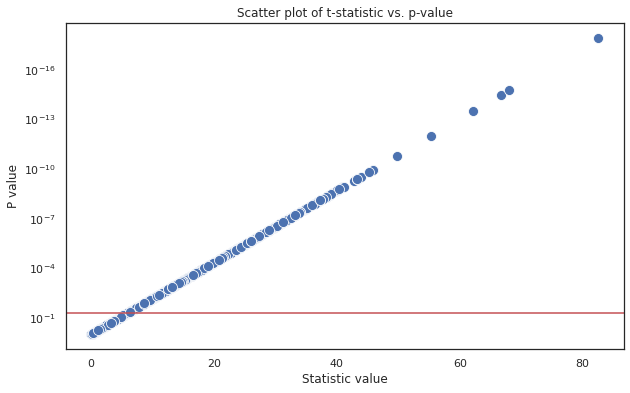

In [6]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [8]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df["P value" ] = results_df["P value"].astype(float)
results_df = results_df.sort_values("P value", ascending=True)
results_df

,Label,Statistic value,P value,Test
1085,Q12809_100.0,82.504627,1.214361e-18,Kruskal-Wallis
1876,Q12809_10.0,68.020271,1.696625e-15,Kruskal-Wallis
1663,Q12809_0.1,66.671195,3.330687e-15,Kruskal-Wallis
159,Q12809_1.0,62.112965,3.253426e-14,Kruskal-Wallis
1012,P34969_100.0,55.336843,9.632905e-13,Kruskal-Wallis
...,...,...,...,...
1103,Q9NXA8_100.0,0.024593,9.877788e-01,Kruskal-Wallis
942,O95398_100.0,0.024214,9.879662e-01,Kruskal-Wallis
1043,Q9Y4P1_100.0,0.020270,9.899160e-01,Kruskal-Wallis
1328,Q16853_100.0,0.016693,9.916883e-01,Kruskal-Wallis


In [9]:
results_df[results_df["P value"]<0.05][:20]

,Label,Statistic value,P value,Test
1085,Q12809_100.0,82.504627,1.214361e-18,Kruskal-Wallis
1876,Q12809_10.0,68.020271,1.696625e-15,Kruskal-Wallis
1663,Q12809_0.1,66.671195,3.330687e-15,Kruskal-Wallis
159,Q12809_1.0,62.112965,3.253426e-14,Kruskal-Wallis
1012,P34969_100.0,55.336843,9.632905e-13,Kruskal-Wallis
242,P41595_10.0,49.769041,1.558799e-11,Kruskal-Wallis
1654,P41595_1.0,45.901743,1.077862e-10,Kruskal-Wallis
859,P28221_100.0,45.878267,1.090589e-10,Kruskal-Wallis
177,Q01959_1.0,45.847596,1.107442e-10,Kruskal-Wallis
590,Q13470_10.0,45.179680,1.546525e-10,Kruskal-Wallis


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in PIDGIN.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2.Tests


    group1 = merged_df[merged_df["DICTrank"] == 0][label]
    group2 = merged_df[merged_df["DICTrank"] == 1][label]
        
    # Perform the Mann-Whitney U test
    try:
        u_stat, p = mannwhitneyu(group1, group2)
    except:
        continue
    results.append({
            'Label': label,
            'Proportion': merged_df[label].mean(),
            'Test': 'Mann-Whitney U',
            'Statistic value': u_stat,
            'P value': p
        })

results_df = pd.DataFrame(results)
results_df

Proportion of P18405_10.0
Proportion of Q16850_100.0
Proportion of Q09428_100.0
Proportion of Q14831_1.0
Proportion of Q00537_1.0
Proportion of O14638_10.0
Proportion of P60900_10.0
Proportion of P07510_1.0
Proportion of Q13698_100.0
Proportion of O14746_10.0
Proportion of P40925_100.0
Proportion of P10809_10.0
Proportion of P45379_10.0
Proportion of P10696_100.0
Proportion of P17538_100.0
Proportion of P28065_1.0
Proportion of Q9H1R3_10.0
Proportion of Q4U2R8_100.0
Proportion of O14730_100.0
Proportion of Q07973_10.0
Proportion of Q9HC29_1.0
Proportion of Q07001_100.0
Proportion of P57059_100.0
Proportion of Q8WXR4_100.0
Proportion of Q9H3Y6_1.0
Proportion of O00238_1.0
Proportion of P10696_10.0
Proportion of Q9Y6L6_10.0
Proportion of P18054_1.0
Proportion of P08311_0.1
Proportion of P29350_100.0
Proportion of Q9Y4K4_0.1
Proportion of P16591_0.1
Proportion of Q99250_0.1
Proportion of P49759_10.0
Proportion of Q96BR1_100.0
Proportion of P78356_10.0
Proportion of P08913_0.1
Proportion o

Proportion of P48066_100.0
Proportion of O15164_1.0
Proportion of Q05513_0.1
Proportion of P00915_0.1
Proportion of Q9UGI6_10.0
Proportion of P68371_0.1
Proportion of Q9Y2T6_0.1
Proportion of Q99436_100.0
Proportion of P51575_100.0
Proportion of P35367_1.0
Proportion of P55212_10.0
Proportion of P02675_100.0
Proportion of P00390_100.0
Proportion of P11216_100.0
Proportion of Q9UL54_10.0
Proportion of P43378_100.0
Proportion of Q99683_0.1
Proportion of Q16881_10.0
Proportion of P40306_100.0
Proportion of P43681_100.0
Proportion of Q15569_10.0
Proportion of Q9UBE0_10.0
Proportion of Q13315_100.0
Proportion of P09211_1.0
Proportion of Q02779_1.0
Proportion of Q8WXA8_10.0
Proportion of O60391_100.0
Proportion of P22748_10.0
Proportion of Q9Y239_10.0
Proportion of P00748_100.0
Proportion of Q13237_100.0
Proportion of Q9GZR1_100.0
Proportion of Q6DT37_10.0
Proportion of P63000_10.0
Proportion of P05067_10.0
Proportion of P04798_1.0
Proportion of P28472_1.0
Proportion of P00918_0.1
Proportion

Proportion of P05093_1.0
Proportion of Q96RG2_10.0
Proportion of P07858_10.0
Proportion of Q9UBS5_100.0
Proportion of P51878_100.0
Proportion of P10635_10.0
Proportion of Q9Y2K7_10.0
Proportion of Q8N1C3_100.0
Proportion of Q13887_100.0
Proportion of P04035_1.0
Proportion of P61088_100.0
Proportion of P24666_10.0
Proportion of P21728_10.0
Proportion of Q01726_100.0
Proportion of Q8N752_100.0
Proportion of Q9UF33_10.0
Proportion of O75688_100.0
Proportion of P11142_100.0
Proportion of Q8NEV1_10.0
Proportion of P19429_10.0
Proportion of P10275_1.0
Proportion of P32245_10.0
Proportion of P46063_100.0
Proportion of P15559_10.0
Proportion of P11229_1.0
Proportion of P25929_1.0
Proportion of P23219_10.0
Proportion of Q9H2X9_100.0
Proportion of O15439_100.0
Proportion of P29323_10.0
Proportion of Q03405_100.0
Proportion of Q13163_10.0
Proportion of P60900_100.0
Proportion of P08575_100.0
Proportion of O95050_100.0
Proportion of P05413_10.0
Proportion of P23219_100.0
Proportion of P28066_10.0


Proportion of O75676_10.0
Proportion of P49721_10.0
Proportion of Q460N3_100.0
Proportion of Q99549_100.0
Proportion of Q8IYT8_10.0
Proportion of P27695_10.0
Proportion of P00352_100.0
Proportion of P02768_100.0
Proportion of P34903_10.0
Proportion of Q06124_100.0
Proportion of P08263_10.0
Proportion of P30874_0.1
Proportion of P41145_10.0
Proportion of P47898_0.1
Proportion of P15538_0.1
Proportion of Q99873_10.0
Proportion of O95264_1.0
Proportion of P09917_0.1
Proportion of P05164_1.0
Proportion of P63316_1.0
Proportion of P04054_10.0
Proportion of P00750_1.0
Proportion of Q06710_1.0
Proportion of O00748_10.0
Proportion of P55789_0.1
Proportion of Q9BYT3_100.0
Proportion of Q05586_1.0
Proportion of P55211_100.0
Proportion of Q16816_100.0
Proportion of P29474_1.0
Proportion of P55211_1.0
Proportion of Q8TDC3_100.0
Proportion of Q9Y2U5_1.0
Proportion of P23219_0.1
Proportion of Q04912_100.0
Proportion of Q9Y2D0_100.0
Proportion of Q9Y6K1_100.0
Proportion of P22888_100.0
Proportion of 

Proportion of O00487_100.0
Proportion of Q13131_0.1
Proportion of Q8TCC7_100.0
Proportion of P49798_100.0
Proportion of Q8N1Q1_0.1
Proportion of Q06609_10.0
Proportion of Q8IVH8_1.0
Proportion of P04062_100.0
Proportion of O75762_100.0
Proportion of P37173_10.0
Proportion of P43351_100.0
Proportion of P28062_100.0
Proportion of P51452_1.0
Proportion of P04066_10.0
Proportion of P03372_10.0
Proportion of P63092_100.0
Proportion of P11230_10.0
Proportion of Q99814_1.0
Proportion of P01911_10.0
Proportion of P22612_100.0
Proportion of P25021_100.0
Proportion of Q9UK32_1.0
Proportion of Q9H1R3_1.0
Proportion of P49720_100.0
Proportion of P40306_10.0
Proportion of Q9H3R0_1.0
Proportion of O95136_100.0
Proportion of Q92772_100.0
Proportion of Q9BXA7_1.0
Proportion of P14867_0.1
Proportion of P62136_10.0
Proportion of O43741_10.0
Proportion of P19174_100.0
Proportion of P11509_100.0
Proportion of P29323_100.0
Proportion of P48169_1.0
Proportion of Q9HBY8_1.0
Proportion of O43353_1.0
Proportio

Proportion of Q9Y2K2_100.0
Proportion of O96028_10.0
Proportion of P23415_10.0
Proportion of P50406_1.0
Proportion of P31213_100.0
Proportion of P41240_100.0
Proportion of P11308_100.0
Proportion of P14616_10.0
Proportion of P10635_1.0
Proportion of P23921_100.0
Proportion of Q9Y6M4_10.0
Proportion of P49761_100.0
Proportion of O60840_100.0
Proportion of Q13324_100.0
Proportion of Q9UF33_1.0
Proportion of P30874_100.0
Proportion of Q04771_1.0
Proportion of O75716_10.0
Proportion of Q9NY57_10.0
Proportion of P24387_10.0
Proportion of P19838_0.1
Proportion of P55055_1.0
Proportion of Q13526_1.0
Proportion of P22748_0.1
Proportion of Q16816_10.0
Proportion of P28472_10.0
Proportion of Q8TD08_1.0
Proportion of Q14973_10.0
Proportion of Q04771_100.0
Proportion of P04150_100.0
Proportion of P00390_10.0
Proportion of P04278_1.0
Proportion of Q9BRS2_10.0
Proportion of P60953_10.0
Proportion of P30307_100.0
Proportion of Q9NNW7_10.0
Proportion of P05230_100.0
Proportion of O95749_100.0
Proporti

,Label,Proportion,Test,Statistic value,P value
0,P18405_10.0,0.046743,Mann-Whitney U,96285.5,0.099067
1,Q16850_100.0,0.063571,Mann-Whitney U,93044.0,0.015560
2,Q09428_100.0,0.055652,Mann-Whitney U,88451.5,0.000438
3,Q14831_1.0,0.051541,Mann-Whitney U,99040.0,0.320887
4,Q00537_1.0,0.054897,Mann-Whitney U,89908.5,0.001543
...,...,...,...,...,...
1888,Q9UK17_100.0,0.075818,Mann-Whitney U,87501.0,0.000178
1889,Q9NUW8_100.0,0.087198,Mann-Whitney U,86636.0,0.000077
1890,Q15139_100.0,0.143314,Mann-Whitney U,101738.5,0.738340
1891,P28335_100.0,0.056250,Mann-Whitney U,83116.5,0.000001


In [11]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df = results_df.sort_values("Statistic value", ascending=False)
results_df

,Label,Proportion,Test,Statistic value,P value
1298,P04066_10.0,0.040630,Mann-Whitney U,121922.5,5.236981e-06
1046,P16109_1.0,0.046400,Mann-Whitney U,120498.5,3.152737e-05
387,Q16790_100.0,0.057010,Mann-Whitney U,120124.5,3.495989e-05
1203,P39748_10.0,0.080205,Mann-Whitney U,119312.0,1.100920e-04
1168,P16109_10.0,0.069048,Mann-Whitney U,119262.5,1.149891e-04
...,...,...,...,...,...
1654,P41595_1.0,0.064993,Mann-Whitney U,76825.5,3.057716e-10
366,P41143_10.0,0.051961,Mann-Whitney U,76726.0,1.809336e-10
859,P28221_100.0,0.043131,Mann-Whitney U,76200.5,8.595735e-11
1663,Q12809_0.1,0.089549,Mann-Whitney U,76034.5,9.413976e-11


<Figure size 2400x1800 with 0 Axes>

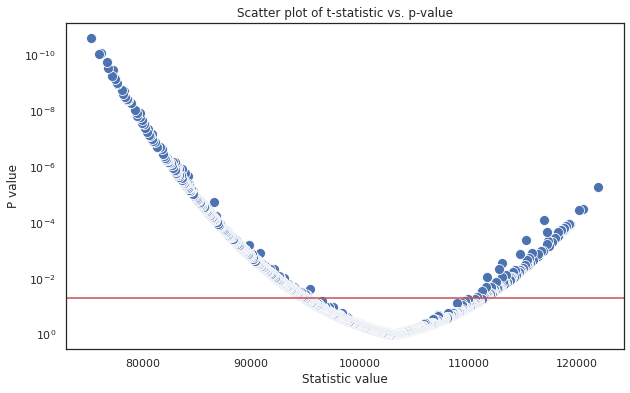

In [12]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [13]:
results_df[results_df["P value"]<0.05]

,Label,Proportion,Test,Statistic value,P value
1298,P04066_10.0,0.040630,Mann-Whitney U,121922.5,5.236981e-06
1046,P16109_1.0,0.046400,Mann-Whitney U,120498.5,3.152737e-05
387,Q16790_100.0,0.057010,Mann-Whitney U,120124.5,3.495989e-05
1203,P39748_10.0,0.080205,Mann-Whitney U,119312.0,1.100920e-04
1168,P16109_10.0,0.069048,Mann-Whitney U,119262.5,1.149891e-04
...,...,...,...,...,...
1654,P41595_1.0,0.064993,Mann-Whitney U,76825.5,3.057716e-10
366,P41143_10.0,0.051961,Mann-Whitney U,76726.0,1.809336e-10
859,P28221_100.0,0.043131,Mann-Whitney U,76200.5,8.595735e-11
1663,Q12809_0.1,0.089549,Mann-Whitney U,76034.5,9.413976e-11
